Aplicacion de Tensorflow/Keras al algoritmo de perros vs gatos.

Datos cargados: (120, 12288) (120,)
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5417 - loss: 2.3353 - val_accuracy: 0.0000e+00 - val_loss: 1.7646
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5625 - loss: 2.3387 - val_accuracy: 1.0000 - val_loss: 0.0094
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 2.7696 - val_accuracy: 0.0000e+00 - val_loss: 3.1281
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6042 - loss: 1.8779 - val_accuracy: 0.7500 - val_loss: 0.4854
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5729 - loss: 1.6224 - val_accuracy: 0.0000e+00 - val_loss: 6.1486
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5000 - loss: 2.4427 - val_accuracy: 0.3750 - val_loss: 0.9614
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6146 - loss: 1.9849 - val_accuracy: 0.9583 - val_loss: 0.1188
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4062 - loss: 3

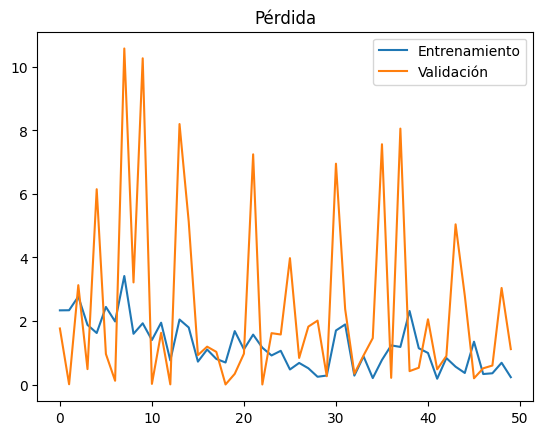

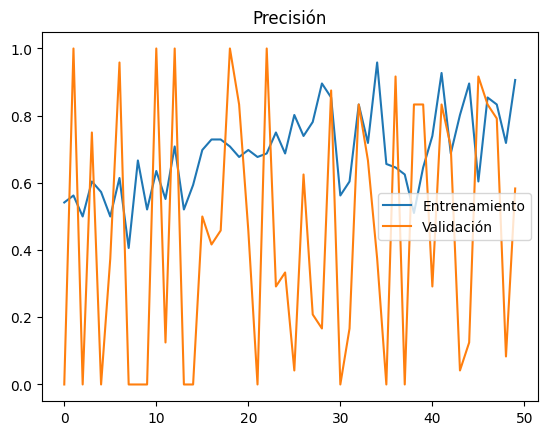

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicción: [[0.5023378]]
Gato (1)


In [7]:
import os as os
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Cargamos y preparamos las imágenes, esta primera parte del codigo jugará el papel de MNIST:

folder = r"C:\Users\op354\OneDrive\Documentos\Oscar\UG\Repositorio Github\ejerciosytareas-Oscarraul28\Img\CatyDog"
def cargar_imagenes(folder, dim=(64,64)):
    X, Y = [], []
    for filename in os.listdir(folder):
        if filename.lower().endswith((".jpg", ".png", ".jpeg")):
            ruta = os.path.join(folder, filename)
            img = Image.open(ruta).convert("RGB")
            img = img.resize(dim)
            arr = np.array(img) / 255.0
            X.append(arr.flatten())
            if filename.startswith("dog"):
                Y.append(0)
            elif filename.startswith("cat"):
                Y.append(1)
    return np.array(X), np.array(Y)
X, Y = cargar_imagenes(folder, dim=(64,64))

#comprobamos:
print("Datos cargados:", X.shape, Y.shape) #Con esto ya reemplazamos MNIST

#Definimos el modelo ahora en base a lo que trabajamos en la actividad anterior de MNIST/Keras:
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X.shape[1],))
])

modelo.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#Entrenamos:
hist = modelo.fit(X, Y, epochs=50, batch_size=16, validation_split=0.2)

#Hacemos una evaluacion para ver como salio:
plt.plot(hist.history['loss'], label='Entrenamiento')
plt.plot(hist.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label='Entrenamiento')
plt.plot(hist.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.legend()
plt.show()

#Podemos probar ahora con una imagen nueva de internet:
def procesar_imagen(ruta, dim=(64,64)):
    img = Image.open(ruta).convert("RGB")
    img = img.resize(dim)
    arr = np.array(img) / 255.0
    return arr.flatten().reshape(1, -1)

nueva = procesar_imagen(r"C:\Users\op354\OneDrive\Documentos\Oscar\UG\Repositorio Github\ejerciosytareas-Oscarraul28\Img\gatonuevo3.jpeg")

pred = modelo.predict(nueva)
print("Predicción:", pred)

if pred >= 0.5:
    print("Gato (1)")
else:
    print("Perro (0)")
